In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
data = pd.read_csv('train.csv')
data['date']=data['date'].replace({'-': ''}, regex=True).astype(int)
data

,id,date,store_nbr,family,sales,onpromotion
0,0,20130101,1,AUTOMOTIVE,0.000,0
1,1,20130101,1,BABY CARE,0.000,0
2,2,20130101,1,BEAUTY,0.000,0
3,3,20130101,1,BEVERAGES,0.000,0
4,4,20130101,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,20170815,9,POULTRY,438.133,0
3000884,3000884,20170815,9,PREPARED FOODS,154.553,1
3000885,3000885,20170815,9,PRODUCE,2419.729,148
3000886,3000886,20170815,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         int32  
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int32(1), int64(3), object(1)
memory usage: 125.9+ MB


In [4]:
from sklearn.preprocessing import LabelEncoder
y = data['sales']
x = data.drop(['sales'],axis=1)
x['family']=LabelEncoder().fit_transform(x['family'])
x

,id,date,store_nbr,family,onpromotion
0,0,20130101,1,0,0
1,1,20130101,1,1,0
2,2,20130101,1,2,0
3,3,20130101,1,3,0
4,4,20130101,1,4,0
...,...,...,...,...,...
3000883,3000883,20170815,9,28,0
3000884,3000884,20170815,9,29,1
3000885,3000885,20170815,9,30,148
3000886,3000886,20170815,9,31,8


In [5]:
data.describe()

,id,date,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.014902e+07,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.341074e+04,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,2.013010e+07,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,2.014023e+07,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.015042e+07,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,2.016062e+07,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,2.017082e+07,5.400000e+01,1.247170e+05,7.410000e+02


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
scaler2 = StandardScaler()
x,y = scaler1.fit_transform(x),scaler2.fit_transform(np.array(y).reshape(-1,1))
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=42)

In [7]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [8]:
y_test = scaler2.inverse_transform(y_test)

In [9]:
y_pred = scaler2.inverse_transform(y_pred)

In [10]:
mae(y_test,y_pred)

427.2869142129808

In [11]:
model.coef_

array([[ 0.03977612, -0.04220847,  0.0373279 , -0.09462912,  0.42130128]])

(array([[2576.   ],
        [   0.   ],
        [ 357.354],
        ...,
        [ 374.   ],
        [   0.   ],
        [  95.   ]]),
 array([[2731.82590581],
        [ 400.49374868],
        [ 274.57195776],
        ...,
        [1822.4412995 ],
        [ 152.82797425],
        [ 366.15907206]]))

<Axes: xlabel='day', ylabel='sales'>

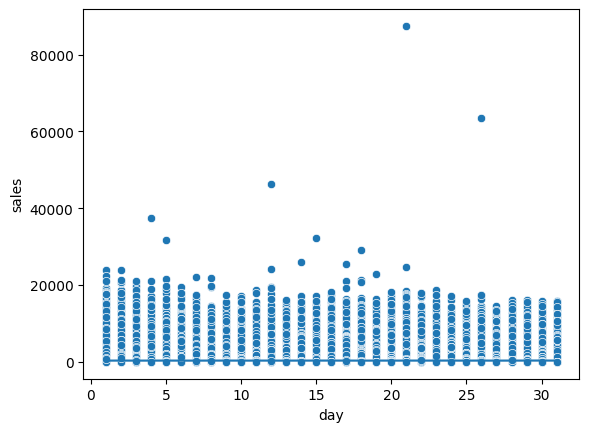

In [32]:

sns.scatterplot(x = X_test['day'],y = y_test)
sns.lineplot(x = X_test['day'],y = y_pred)